In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Our dataset contains timestamped blood-glucose levels. Still need to finish implementing a column for rate of change(Was guided to look into five point stencils for first/second order derivatives - have looked into them but have a few questions on implementation here). Did a bit of preprocessing(mainly trying to round to even numbers(the readings are not all at the same times during the day, therefore grouping by them becomes a nuisance) and looking over the general spread of the data. 

In [83]:
df = pd.read_csv('./data/12-3l-21_to_3-30-22.csv',skiprows=[x for x in range(1, 12)],)
df = df.iloc[:,[1, 2, 7]]
df = df[df.isin(['Low', 'High']) == False]
df = df[df.iloc[:,2].notna()]
dfM = df
dfM = dfM.astype({dfM.columns[2]:'float64'})
dfM.head(10)

,Timestamp (YYYY-MM-DDThh:mm:ss),Event Type,Glucose Value (mg/dL)
0,2021-12-31T00:00:48,EGV,158.0
1,2021-12-31T00:05:48,EGV,158.0
2,2021-12-31T00:10:49,EGV,157.0
3,2021-12-31T00:15:48,EGV,149.0
4,2021-12-31T00:20:48,EGV,143.0
5,2021-12-31T00:25:48,EGV,135.0
6,2021-12-31T00:30:48,EGV,139.0
7,2021-12-31T00:35:49,EGV,142.0
8,2021-12-31T00:40:49,EGV,146.0
9,2021-12-31T00:45:48,EGV,145.0


In [84]:
gluc = dfM.iloc[:,2]
gluc.describe()

count    25016.000000
mean       186.106132
std         57.167021
min         44.000000
25%        145.000000
50%        182.000000
75%        223.000000
max        395.000000
Name: Glucose Value (mg/dL), dtype: float64

In [85]:
dfM[['MM-DD', 'HH:MM']] = dfM.iloc[:,0].str.split('T', 1, expand=True)
dfM.drop('Timestamp (YYYY-MM-DDThh:mm:ss)', axis=1, inplace=True)


In [89]:
dfM['HH:MM'] = dfM['HH:MM'].str.slice(start=0, stop=5)
dfM['MM-DD'] = dfM['MM-DD'].str.slice(start=5)
dfM['HH:MM'] = dfM['HH:MM'].apply(lambda x: x[0:4] + str(int(5*round(int(x[4:])/5)))) #make everything into nice chunks of five for easier visualization

In [111]:
means = dfM.groupby(['HH:MM'], as_index=False).mean().to_numpy().T
means[0][:10], means[1][:10]

(array(['00:00', '00:05', '00:10', '00:15', '00:20', '00:25', '00:30',
        '00:35', '00:40', '00:45'], dtype=object),
 array([194.61627906976744, 193.8426966292135, 192.64772727272728,
        192.43023255813952, 193.183908045977, 193.7078651685393,
        191.0344827586207, 191.0, 189.20454545454547, 189.27586206896552],
       dtype=object))

Text(0.5, 0, 'Mintues')

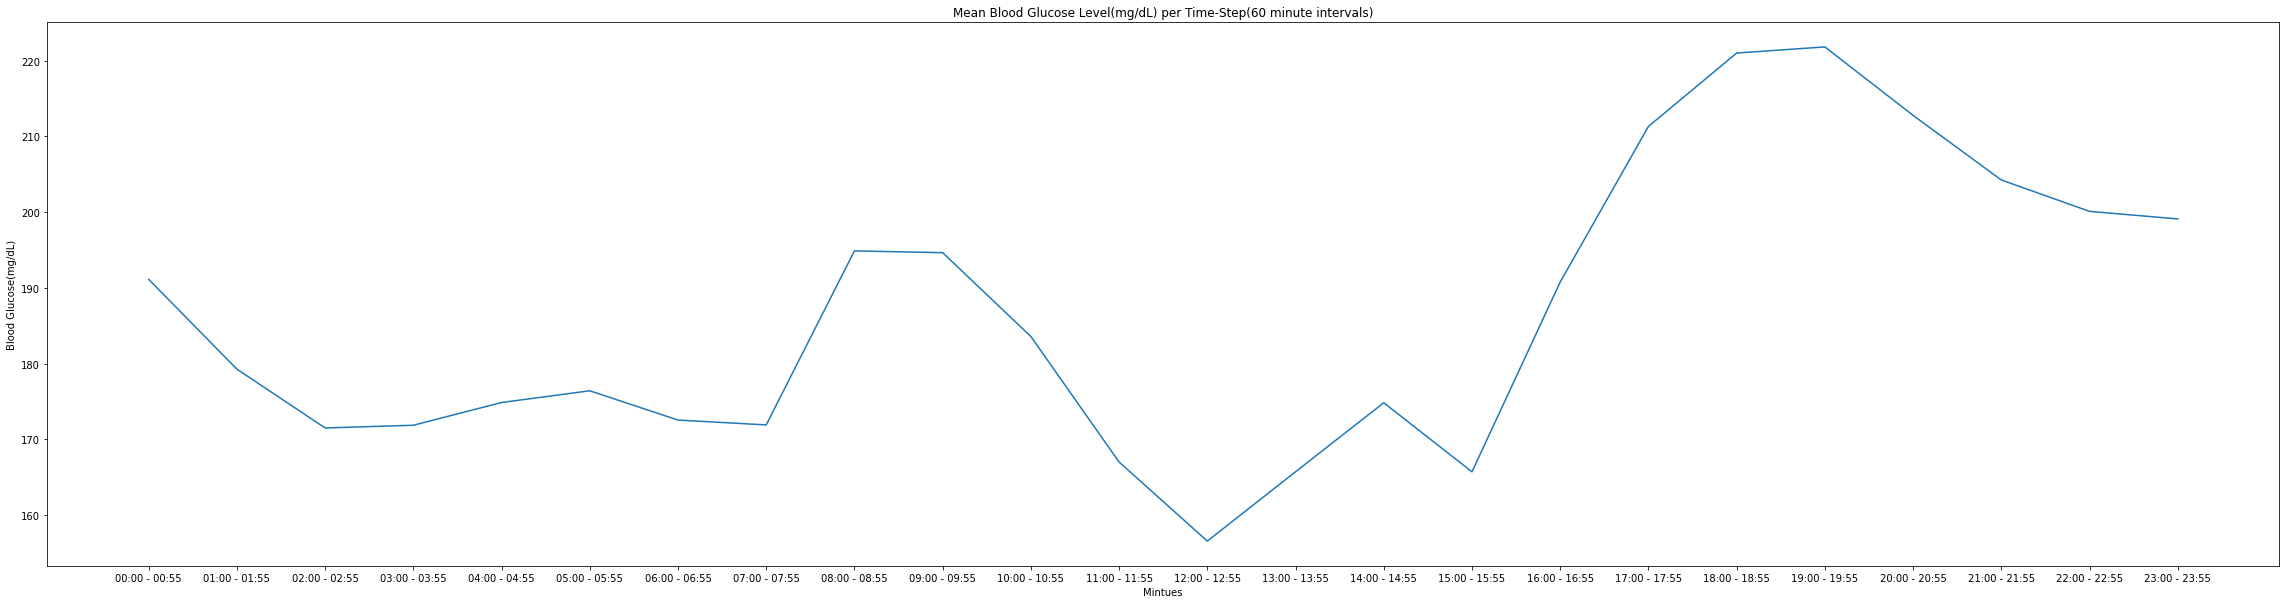

In [146]:
plotted_means = [[] for _ in [0,1]]
stepsize = 12
for x in range(0, len(means[0]), stepsize):
    plotted_means[1].append(np.sum(means[1][x:x+stepsize])/stepsize)
    plotted_means[0].append(means[0][x] + " - " + means[0][x+stepsize-1])
fig, ax = plt.subplots(figsize=[40,10])
ax.plot(plotted_means[0], plotted_means[1])
ax.set_title("Mean Blood Glucose Level(mg/dL) per Time-Step(60 minute intervals)")
ax.set_ylabel("Blood Glucose(mg/dL)")
ax.set_xlabel("Mintues")

In [147]:
means[0][0:12]

array(['00:00', '00:05', '00:10', '00:15', '00:20', '00:25', '00:30',
       '00:35', '00:40', '00:45', '00:50', '00:55'], dtype=object)